In [2]:
!pip install keras

In [0]:
from keras.datasets import imdb

In [0]:
# num_words=10000,只保留频率最高的10000词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
# train_data是(25000,)的向量，每个元素是一个长度不等的列表。关于如何创建元素是列表的数组，可以参考https://stackoverflow.com/a/33987165/12003361
train_data.shape

(25000,)

In [76]:
# 这里有个陷阱，对于列表数组使用max虽然不会报错，但会返回奇怪的结果。
max([max(sequence) for sequence in train_data])

9999

In [0]:
# word_index是一个由词向数字映射的字典
word_index = imdb.get_word_index()
# 将字典键和值反转，变成数字到词的映射。字典的起始值为1。
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# train_data的值并不是和字典的index直接对应，而是存在i - 3的关系，train_data中用0，1，2代表无意义或不明确的字符，这些数字（字符）进行转换时会变成"？"
decode_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [18]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [33]:
# 手动one-hot
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    # 注意此处sequence并不是一个数字，而是一个列表。用列表做了一次切片。
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 2, 270, 2, 5, 2, 2, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 2, 21, 27, 9685, 6139, 5, 2, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 2, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 2, 2, 544, 5, 383, 1271, 848, 1468, 2, 497, 2, 8, 1597, 8778, 2, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]
[1, 6, 52, 7465, 430, 22, 9, 220, 2594, 8, 28, 2, 519, 3227, 6, 769, 15, 47, 6, 3482, 4067, 8, 114, 5, 33, 222, 31, 55, 184, 704, 5586, 2, 19, 346, 3153, 5, 6, 364, 350, 4, 184, 5586, 9, 133, 1810, 11, 5417, 2, 21, 4, 7298, 2, 570, 50, 2005, 2643, 9, 6, 1249, 17, 6, 2, 2, 21, 17, 6, 1211, 232, 1138, 2249, 29, 266, 56, 96, 346, 194, 308, 9, 194

In [0]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

In [85]:
from keras import models
from keras import layers

model = models.Sequential()
# 如果把batch_size放在input_shape里，你就是个傻子。
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
# 输出层的神经元只有一个，并且激活函数用sigmoid，结果可以解释为概率。
model.add(layers.Dense(1, activation="sigmoid"))

In [87]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [90]:
# keara.fit()的返回值是history object。程序会在每个epoch的结束，计算validation数据的loss和accuracy。
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 220us/step - loss: 0.5102 - acc: 0.7969 - val_loss: 0.3990 - val_acc: 0.8582
Epoch 2/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.3112 - acc: 0.8984 - val_loss: 0.3043 - val_acc: 0.8882
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2202 - acc: 0.9283 - val_loss: 0.2772 - val_acc: 0.8907
Epoch 4/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.1715 - acc: 0.9423 - val_loss: 0.2783 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1388 - acc: 0.9537 - val_loss: 0.3266 - val_acc: 0.8743
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.1126 - acc: 0.9655 - val_loss: 0.3109 - val_acc: 0.8802
Epoch 7/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.0901 - acc: 0.9730 - val_loss: 0

In [91]:
# history.history是一个字典，记录了每个epoch结束时的各项数据。
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

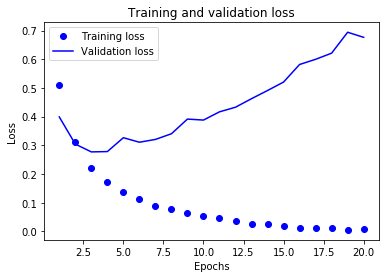

In [94]:
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

# "bo"-->blue dot "b"-->blue line
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

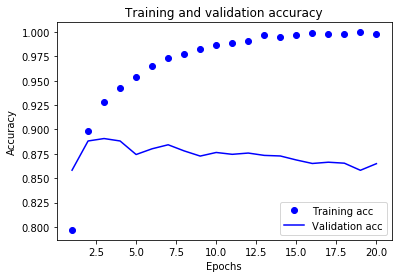

In [95]:
# 清楚当前图片
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [98]:
# 模型在2rd epoch之后就开始有明显的过拟合倾向。调整epochs的值。
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 3s 106us/step - loss: 0.0636 - acc: 0.9818
Epoch 2/3
25000/25000 [==============================] - 3s 106us/step - loss: 0.0524 - acc: 0.9851
Epoch 3/3
25000/25000 [==============================] - 3s 102us/step


In [99]:
results

[0.6586969258594513, 0.85252]